In [19]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import random
import torch
from model import ViT16, MobileNetV2, ModelTrainer
import data
from data import TransDataset
import isic2019
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [21]:
isic2019.rename_downsampled()

Complete.


In [22]:
batch_size = 64
img_size = (224, 224)
num_class = 3

df_train = isic2019.get_dataset("train")
df_valid = isic2019.get_dataset("valid")
train_loader = data.get_dataloader(df_train, img_size, batch_size, train=True)
valid_loader = data.get_dataloader(df_valid, img_size, batch_size, train=False)

/home/kuniko/notebooks/explain/isic2019.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["filepath"] = root + "ISIC_2019_Training_Input/" + df["image"] + ".jpg"
/home/kuniko/notebooks/explain/isic2019.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["segpath"] = root + "SEG/" + df["image"] + ".png"
/home/kuniko/notebooks/explain/isic2019.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

../../dataset/SafeExplain/mobile2019/ aready exist.
Sub folders of ../../dataset/SafeExplain/mobile2019/ was deleted.
Epoch: 0 | Validation Accuracy: 0.4214 | Loss: 1.0854 | F1: 0.3250
Epoch: 1 | Validation Accuracy: 0.5256 | Loss: 0.9868 | F1: 0.4710
Epoch: 2 | Validation Accuracy: 0.5752 | Loss: 0.9062 | F1: 0.5299
Epoch: 3 | Validation Accuracy: 0.6177 | Loss: 0.8422 | F1: 0.5671
Epoch: 4 | Validation Accuracy: 0.6541 | Loss: 0.8000 | F1: 0.5932
Epoch: 5 | Validation Accuracy: 0.6663 | Loss: 0.7747 | F1: 0.6046
Epoch: 6 | Validation Accuracy: 0.6809 | Loss: 0.7528 | F1: 0.6142
Epoch: 7 | Validation Accuracy: 0.7098 | Loss: 0.7362 | F1: 0.6392
Epoch: 8 | Validation Accuracy: 0.7118 | Loss: 0.7201 | F1: 0.6453
Epoch: 9 | Validation Accuracy: 0.7148 | Loss: 0.7144 | F1: 0.6416
Epoch: 10 | Validation Accuracy: 0.7302 | Loss: 0.7059 | F1: 0.6547
Epoch: 11 | Validation Accuracy: 0.7337 | Loss: 0.6991 | F1: 0.6539
Epoch: 12 | Validation Accuracy: 0.7222 | Loss: 0.6693 | F1: 0.6589
Epoch: 1

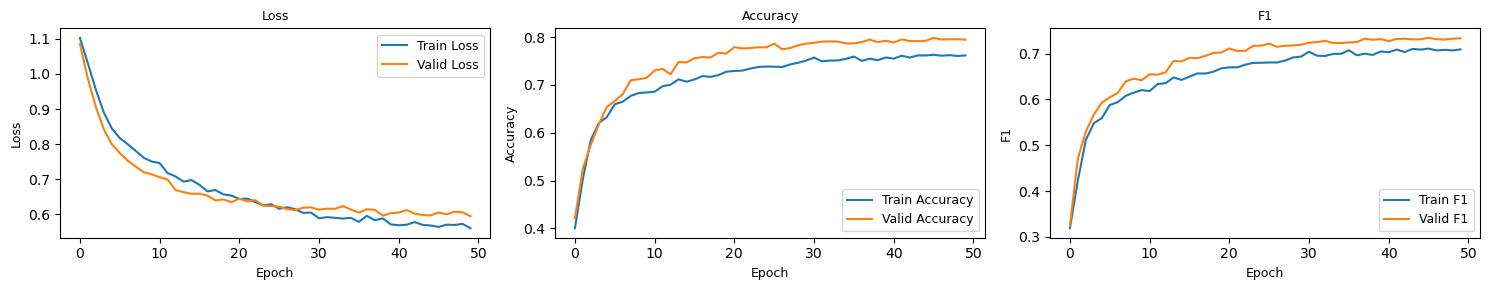

../../dataset/SafeExplain/mobile2019/model_49.pt


In [23]:
num_epochs = 50
lr = 1e-5
warmup_epochs=15
model_save_directory = "../../dataset/SafeExplain/mobile2019/"
utils.create_directory(model_save_directory)
utils.delete_subfolders(model_save_directory)
model = MobileNetV2(num_class)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr, warmup_epochs=warmup_epochs)

../../dataset/SafeExplain/vit2019/ aready exist.
Sub folders of ../../dataset/SafeExplain/vit2019/ was deleted.
Epoch: 0 | Validation Accuracy: 0.6867 | Loss: 0.8338 | F1: 0.5982
Epoch: 1 | Validation Accuracy: 0.7292 | Loss: 0.7430 | F1: 0.6528
Epoch: 2 | Validation Accuracy: 0.7021 | Loss: 0.7322 | F1: 0.6369
Epoch: 3 | Validation Accuracy: 0.7536 | Loss: 0.6441 | F1: 0.6886
Epoch: 4 | Validation Accuracy: 0.7506 | Loss: 0.6403 | F1: 0.6930
Epoch: 5 | Validation Accuracy: 0.7760 | Loss: 0.5978 | F1: 0.7149
Epoch: 6 | Validation Accuracy: 0.8054 | Loss: 0.5775 | F1: 0.7444
Epoch: 7 | Validation Accuracy: 0.8141 | Loss: 0.5873 | F1: 0.7498
Epoch: 8 | Validation Accuracy: 0.8173 | Loss: 0.5615 | F1: 0.7602
Epoch: 9 | Validation Accuracy: 0.8245 | Loss: 0.5973 | F1: 0.7622
Epoch: 10 | Validation Accuracy: 0.7743 | Loss: 0.5154 | F1: 0.7312
Epoch: 11 | Validation Accuracy: 0.8161 | Loss: 0.5338 | F1: 0.7604
Epoch: 12 | Validation Accuracy: 0.7974 | Loss: 0.5057 | F1: 0.7537
Epoch: 13 | Va

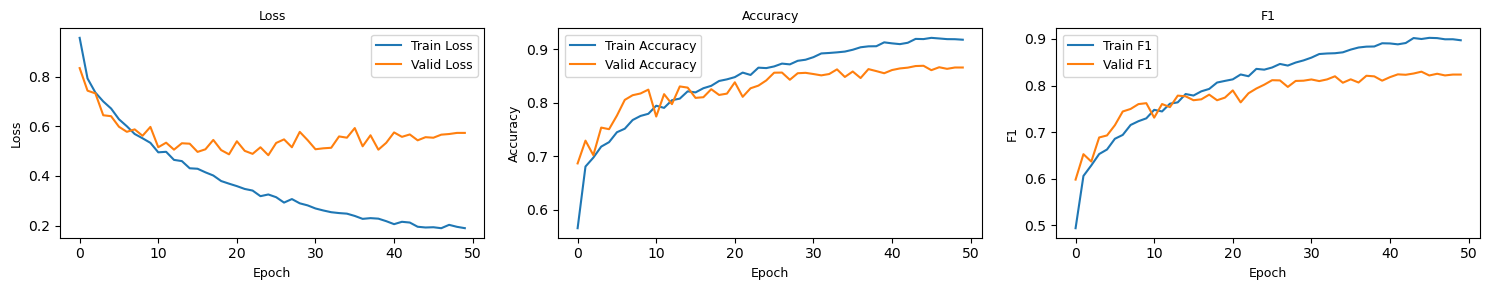

../../dataset/SafeExplain/vit2019/model_24.pt


In [24]:
num_epochs = 50
lr = 1e-5
warmup_epochs=5

model_save_directory = "../../dataset/SafeExplain/vit2019/"
utils.create_directory(model_save_directory)
utils.delete_subfolders(model_save_directory)
model = ViT16(num_class)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr, warmup_epochs=warmup_epochs)